<center><b><font size='6' color='Purple' face='Verdana'>DATA BOOTCAMP FINAL PROJECT</font></b></center>
<br><br>
<font size='4' color='Purple' face='Verdana'>
    <b>Title</b>: Analysing San Francisco Restuarants' Health Inspection Scores
<br><br>
    <b>Data Set</b>: <a href=https://www.kaggle.com/san-francisco/sf-restaurant-scores-lives-standard>SF Restaurant Scores - LIVES Standard</a>
<br><br>
    <b>Data Source</b>: Kaggle
<br><br>
    <b>Submission Date</b>: May 15, 2019
</font>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
import matplotlib.dates as mdates

In [3]:
##Read Data command for Ryan
#scores = pd.read_csv('C:/Users/ryanh/OneDrive/Documents/sf-restaurant-scores-lives-standard/restaurant-scores-lives-standard.csv')
##Read Data command for Rich
#scores = pd.read_csv('/Users/richiebubbs/Downloads/sf-restaurant-scores-lives-standard/restaurant-scores-lives-standard.csv')

<center><b><font size='4' color='Purple' face='Verdana'>DATA FRAME</b></center>

In [5]:
scores

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_type,violation_id,violation_description,risk_category,Neighborhoods,Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
0,97164,Golden Waffle,244 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,NaN,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,69487,Hakkasan San Francisco,1 Kearny St,San Francisco,CA,94108,NaN,NaN,NaN,NaN,...,Routine - Unscheduled,69487_20180418_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
2,91044,Chopsticks Restaurant,4615 Mission St,San Francisco,CA,94112,NaN,NaN,NaN,NaN,...,Non-inspection site visit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,85987,Tselogs,552 Jones St,San Francisco,CA,94102,NaN,NaN,NaN,NaN,...,Routine - Unscheduled,85987_20180412_103132,Improper thawing methods,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
4,96024,Fig & Thistle Market,691 14th St,San Francisco,CA,94114,NaN,NaN,NaN,NaN,...,New Ownership - Followup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,97503,Moscone South Main Kitchen,747 Howard St,San Francisco,CA,94103,NaN,NaN,NaN,NaN,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,97748,FISTFUL OF TACOS,201 Harrison St Unit C-2,San Francisco,CA,94105,NaN,NaN,NaN,1.415046e+10,...,Reinspection/Followup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,77901,"The Estate Kitchen, LLC",799 Bryant St,San Francisco,CA,94107,NaN,NaN,NaN,NaN,...,Routine - Unscheduled,77901_20180416_103139,Improper food storage,Low Risk,NaN,NaN,NaN,NaN,NaN,NaN
8,87782,Beloved Cafe,3338 24th St,San Francisco,CA,94110,NaN,NaN,NaN,1.415554e+10,...,Routine - Unscheduled,87782_20180502_103161,Low risk vermin infestation,Low Risk,NaN,NaN,NaN,NaN,NaN,NaN
9,77442,Gashead Tavern,2351 Mission St,San Francisco,CA,94110,NaN,NaN,NaN,1.415571e+10,...,Reinspection/Followup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<center><b><font size='4' color='Purple' face='Verdana'>COLUMNS AND DATA TYPES</b></center>

In [6]:
scores.dtypes

business_id                    int64
business_name                 object
business_address              object
business_city                 object
business_state                object
business_postal_code          object
business_latitude            float64
business_longitude           float64
business_location             object
business_phone_number        float64
inspection_id                 object
inspection_date               object
inspection_score             float64
inspection_type               object
violation_id                  object
violation_description         object
risk_category                 object
Neighborhoods                float64
Police Districts             float64
Supervisor Districts         float64
Fire Prevention Districts    float64
Zip Codes                    float64
Analysis Neighborhoods       float64
dtype: object

<center><b><font size='4' color='Purple' face='Verdana'>DISTRIBUTION OF INSPECTION SCORES</b></center>

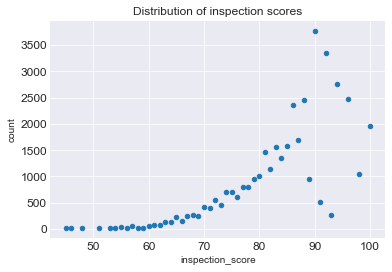

In [12]:
score_distro = scores.groupby(['inspection_score'],as_index=False)['inspection_score'].agg({'inspection_id':'count'})
score_distro = score_distro.rename({'inspection_id':'count'},axis=1)
plt.style.use('seaborn-darkgrid')
score_distro.plot.scatter(x='inspection_score',y='count',fontsize=12,title="Distribution of inspection scores")
plt.show()

<font size='3' color='Green' face='Verdana'>
    <u>Inference:</u><br></font><br>
<font size='3' color='Black' face='Verdana'>
Based on the distribution, SF restaurants rarely score below a 70 on inspections.
</font>

<center><b><font size='4' color='Purple' face='Verdana'>GEOGRAPHIC DISTRIBUTION</font></b></center>

<font size='3' color='Black' face='Verdana'>
Using Latitude and Longitude data we created a scatterplot, using google maps we looked at the geographic distribution, noting the densest areas of restaurants occur in the <b>financial district</b> and near <b>Fisherman's Wharf</b>.  The former is an area popular with commuters and the latter is popular with tourists.</font>

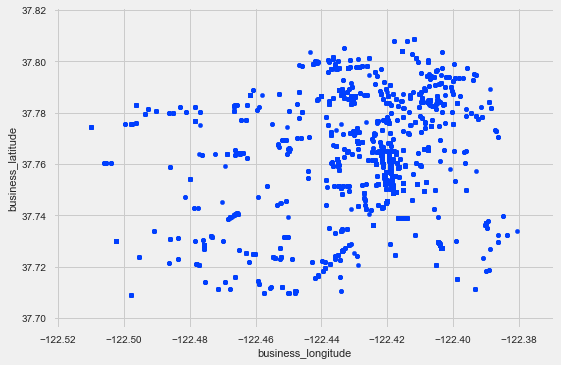

In [137]:
combo.plot.scatter(x ="business_longitude", y = "business_latitude",title="")
plt.show()

<center><b><font size='4' color='Purple' face='Verdana'>RESTAURANT CHAINS VS NON-CHAINS</font></b></center>

<font size='3' color='Black' face='Verdana'>
Next, we wanted to dig into the inspection performance of chains. Do chains tend to outperform other restaurants, and to what degree?

We manually created a summary table in CSV that rolls up alternative spellings of a restaurant's name into a single identity.
</font>

In [13]:
##Read Data command for Ryan
#summary_name = pd.read_csv('C:/Users/ryanh/OneDrive/Documents/sf-restaurant-scores-lives-standard/chains.csv')

###Merging the Chains data set with Scores dataset so as to have an aggregate (rollup) business name to avoid 
#inconsistent spellings and other variations of the same business name
scores = scores.merge(summary_name[['business_name','agg_biz_name']],on='business_name',how='left')
chains = scores.dropna(subset = ['inspection_score']).groupby(['agg_biz_name'],as_index=False).\
agg({'business_id':'nunique','inspection_score':'median'})
## median instead of average to help control for the influence of outlier scores on the average
chains = chains.rename({'business_id':'count','inspection_score':'median_score','agg_biz_name':'chain_name'},axis=1)

In [18]:
### order by descending to see which have highest locations
chains.sort_values('count', ascending=False).head(20)

,chain_name,count,median_score
3745,Starbucks Coffee,74,96.0
3772,Subway,36,89.5
3086,Peet's Coffee & Tea,32,94.0
550,Bon Appetit,23,94.0
118,AFC Sushi,20,96.0
35,7 Eleven,16,86.0
1124,Doggie Diner,15,96.0
3520,Safeway,15,90.0
1643,Guckenheimer,15,96.0
3113,Phil'z Coffee,12,92.0


<font size='3' color='Green' face='Verdana'>
    <u>Inference:</u><br></font><br>
<font size='3' color='Black' face='Verdana'>
Unsurprisingly, some major chains like Starbucks, Subway, Peet's Coffee, and 7-Eleven showed up among the restaurants with the most locations in San Francisco.<br> We also get concession stands like <a href=https://www.yelp.com/biz/doggie-diner-san-francisco-3>Doggie Diner</a>, <a href=https://www.guckenheimer.com/>Guckenheimer</a>,an employer-provided cafeteria company, and local deli chain <a href=https://www.leesdeli.com/>Lee's Deli</a>.
</font>

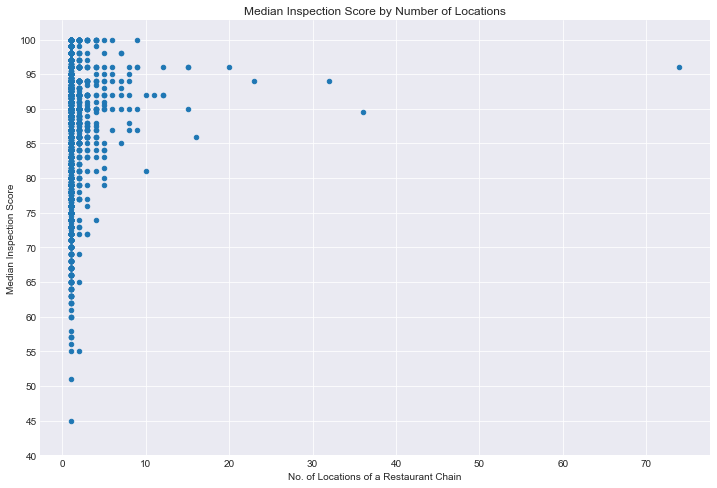

In [28]:
chains.plot.scatter(x='count',y='median_score',figsize=(12,8))
plt.title('Median Inspection Score by Number of Locations')
plt.yticks(np.arange(40,101,5))
plt.ylabel("Median Inspection Score")
plt.xlabel("No. of Locations of a Restaurant Chain")
plt.show()

<font size='3' color='Green' face='Verdana'>
    <u>Inference:</u><br></font><br>
<font size='3' color='Black' face='Verdana'>
Based purely on the distribution in the scatter plot, it appears that chains might score higher than non-chains on inspection scores. 
<br>
Most of the lowest scores seem to come from restaurants with a single store location.
<br>
The lowest score for a restaurant chain (more than one store location) is 55.
<br><br><br>
To get a clearer view of this relationship, we ran a regression.
</font>

<center><b><font size='4' color='Purple' face='Verdana'>REGRESSION TO CORRELATE CHAINS WITH INSPECTION SCORES</font></b></center>

In [29]:
major_chains = chains.loc[chains['count']>3]
scores['chain'] = (scores['agg_biz_name'].isin(list(major_chains['chain_name'])))*1
score_by_id = scores.dropna(subset = ['inspection_score']).groupby(['business_id'],as_index=False).\
agg({'inspection_score':'median','chain':'median'})
score_by_id = score_by_id.rename({'inspection_score':'median_score'},axis=1)

In [30]:
print(smf.ols('median_score ~ chain',data=score_by_id).fit().summary())

                            OLS Regression Results                            
Dep. Variable:           median_score   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     145.5
Date:                Wed, 15 May 2019   Prob (F-statistic):           4.24e-33
Time:                        20:15:00   Log-Likelihood:                -19452.
No. Observations:                5622   AIC:                         3.891e+04
Df Residuals:                    5620   BIC:                         3.892e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     88.8118      0.110    804.760      0.0

<font size='3' color='Green' face='Verdana'>
    <u>Inference:</u><br></font><br>
<font size='3' color='Black' face='Verdana'>
If we run the regression for individual stores (instead of at the chain level), we see that chains typically perform 3-4 points better on inspections than non-chains. However, p-values are very low, suggesting many other factors affect scores.
</font>
<br><br><br>

<font size='3' color='Black' face='Verdana'>
To see how other types of restaurants tend to perform, we used the text of the business_name to create categories we can add to the regression
</font>

In [32]:
scores['coffee'] = (scores['agg_biz_name'].str.lower().str.contains('coffee'))*1+(scores['agg_biz_name'].str.lower().str.contains('cafe'))*1
scores['school'] = (scores['agg_biz_name'].str.lower().str.contains('school'))*1+(scores['agg_biz_name'].str.lower().str.contains('academy'))*1
scores['fish'] = (scores['agg_biz_name'].str.lower().str.contains('fish'))*1+(scores['agg_biz_name'].str.lower().str.contains('sushi'))*1+(scores['agg_biz_name'].str.lower().str.contains('seafood'))*1
scores['bar'] = (scores['agg_biz_name'].str.lower().str.contains('bar'))*1+(scores['agg_biz_name'].str.lower().str.contains('pub'))*1+(scores['agg_biz_name'].str.lower().str.contains('brew'))*1
scores['bakery'] = (scores['agg_biz_name'].str.lower().str.contains('bakery'))*1
scores['food_truck'] = (scores['agg_biz_name'].str.lower().str.contains('cart'))*1+(scores['agg_biz_name'].str.lower().str.contains('truck'))*1
scores['senior'] = (scores['agg_biz_name'].str.lower().str.contains('senior'))*1
scores['cafeteria'] = (scores['agg_biz_name'].str.lower().str.contains('employee'))*1+(scores['agg_biz_name'].str.lower().str.contains('cafeteria'))*1
scores['taco'] = (scores['agg_biz_name'].str.lower().str.contains('taco'))*1+(scores['agg_biz_name'].str.lower().str.contains('taqueria'))*1
scores['burger'] = (scores['agg_biz_name'].str.lower().str.contains('burger'))*1

booleans = ['coffee','school','fish','bar','bakery','food_truck'
       ,'senior','cafeteria','taco','burger']

scores[booleans] = scores[booleans].apply(pd.to_numeric, errors='coerce')


score_by_id = scores.dropna(subset = ['inspection_score']).groupby(['business_id'],as_index=False).agg({'inspection_score':'median'
                                                                                                        ,'chain':'median'
                                                                                                        ,'coffee':'median'
                                                                                                        ,'school':'median'
                                                                                                        ,'fish':'median'
                                                                                                       ,'bar':'median'
                                                                                                       ,'bakery':'median'
                                                                                                       ,'food_truck':'median'
                                                                                                       ,'senior':'median'
                                                                                                       ,'cafeteria':'median'
                                                                                                       ,'taco':'median'
                                                                                                       ,'burger':'median'})
score_by_id = score_by_id.rename({'inspection_score':'median_score'},axis=1)

In [33]:
print(smf.ols('median_score ~ chain + coffee + school + fish + bar + bakery + food_truck + senior + cafeteria + taco + burger'
              ,data=score_by_id).fit().summary())

                            OLS Regression Results                            
Dep. Variable:           median_score   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     32.10
Date:                Wed, 15 May 2019   Prob (F-statistic):           8.59e-67
Time:                        20:23:25   Log-Likelihood:                -19352.
No. Observations:                5622   AIC:                         3.873e+04
Df Residuals:                    5610   BIC:                         3.881e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     88.6779      0.123    719.352      0.0

<font size='3' color='Green' face='Verdana'>
    <u>Inference:</u><br></font><br>
<font size='3' color='Black' face='Verdana'>
We still have pretty low p-values (6%), but these results do indicate that cafeterias in schools and senior centers tend to acheive significantly higher inspection scores than other businesses. Surprisingly, food trucks also seem to have higher scores. <br>Bakeries, taquerias, and seafood restaurants tend to underperform on inspections.
<br><br>
Just to check our results a bit more, we also looked at the number of businesses included in each category.
</font>

<center><b><font size='4' color='Purple' face='Verdana'>RESTAURANTS BY CATEGORY</font></b></center>

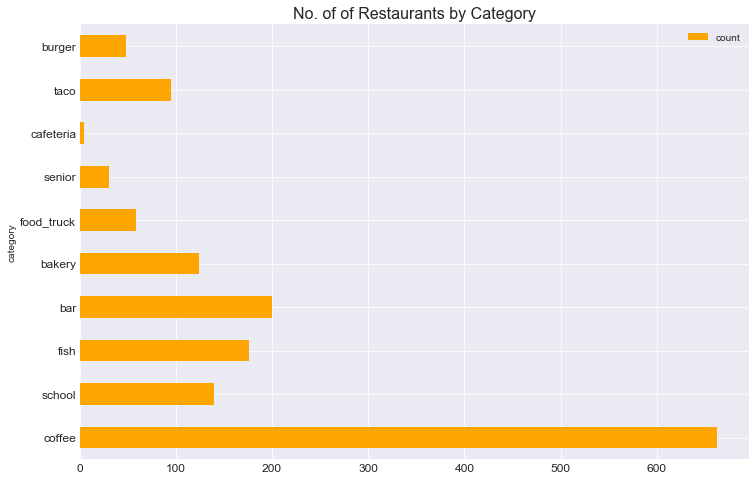

In [36]:
bool_counts = []
for i in booleans:
    column = score_by_id.loc[score_by_id[i]==1]
    bool_counts.append((i,column['business_id'].nunique()))

bool_counts = pd.DataFrame(bool_counts,columns=('category','count'))
bool_counts.set_index(bool_counts['category'])
bool_counts.plot.barh('category','count', figsize=(12,8), fontsize = 12, color = 'orange')
plt.title('No. of of Restaurants by Category', fontsize = 16)    
plt.show()    

<font size='3' color='Green' face='Verdana'>
    <u>Inference:</u><br></font><br>
<font size='3' color='Black' face='Verdana'>
We do not have many 'cafeterias' in our sample, but have a robust amount for the other groups.
<BR><BR><br>
Next, we wanted to dig into the restaurants with the 12 lowest inspection scores to see how they did over time. Did they improve in subsequent inspections? Do they close quickly after receiving a very low score?
</font>

<center><b><font size='4' color='Purple' face='Verdana'>LOW SCORING RESTAURANTS</font></b></center>

In [39]:
worst_12 = chains.sort_values('median_score').head(12)['chain_name']

worst_12_scores = scores.loc[scores['agg_biz_name'].isin(list(worst_12))]

worst_by_insp = worst_12_scores.dropna(subset = ['inspection_score']).dropna(subset = ['inspection_date']).groupby(['business_id','business_name','inspection_date'],as_index=False).agg({'inspection_score':'median'})
worst_by_insp = worst_by_insp.rename({'inspection_score':'score'},axis=1)
worst_by_insp['inspection_date']=pd.to_datetime(worst_by_insp['inspection_date'])
worst_by_insp = worst_by_insp.sort_values('inspection_date')

worst_12_location = worst_12_scores.groupby(['business_name', 'business_address']).size().reset_index()
worst_12_location

,business_name,business_address,0
0,Cha Cha Cha on Mission,2327 Mission St,22
1,EDEN PLAZA CAFE,600 HARRISON St,10
2,Golden Wok,295 B Orizaba Ave,34
3,La Jefa,445 Bayshore Blvd,20
4,Lollipot,890 Taraval St,38
5,Mi Tierra Market,2023 MISSION St,24
6,Mission Hunan Restaurant,2960 16th St,17
7,"New Garden Restaurant, Inc.",716 Kearny St,24
8,Poki Time,2101 Lombard St,18
9,Poki Time,549 Irving St,8


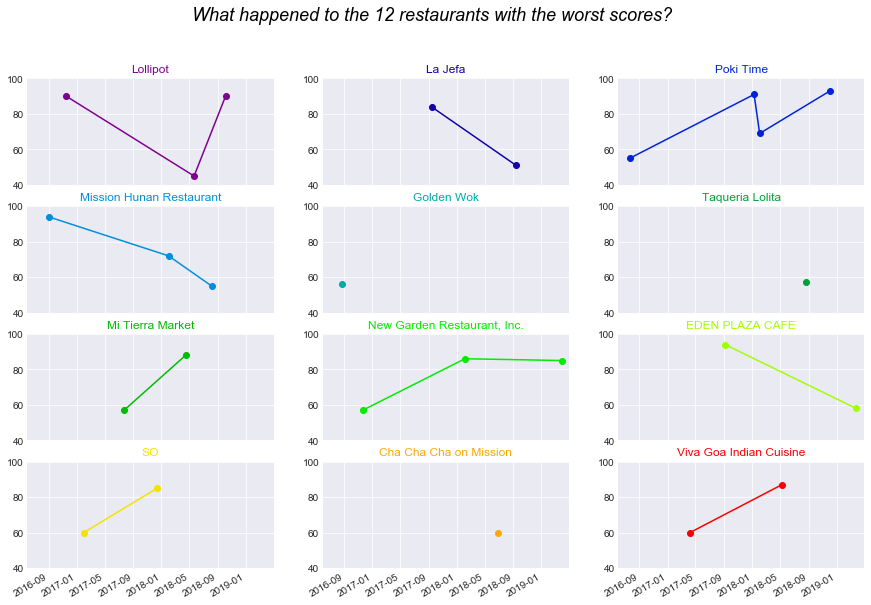

In [42]:
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('nipy_spectral',15)
fig, ax = plt.subplots(figsize=(15, 10))

num=0
for i in worst_12:
    filtered = worst_by_insp.loc[worst_by_insp['business_name']==i,:]
    num+=1
    plt.subplot(4,3, num)
    plt.plot(filtered['inspection_date'],filtered['score'],marker='o',color=palette(num),label = i)
   
    plt.title(i,color=palette(num) )
    
    plt.ylim(40,100)
    plt.xlim('2016-06-01','2019-04-30')
 

plt.suptitle("What happened to the 12 restaurants with the worst scores?", 
             fontsize=18, fontweight=2, color='black', style='italic')
    
###ax.xaxis_date()
plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%Y-%m')
plt.gca().xaxis.set_major_formatter(myFmt)


plt.show()

<font size='3' color='Green' face='Verdana'>
    <u>Inference:</u><br></font><br>
<font size='3' color='Black' face='Verdana'>
One bad inspection is not a death knell for a restaurant. Of these 12, only <a href=https://www.yelp.com/biz/lollipot-san-francisco>Lollipot</a>, <a href=https://www.yelp.com/biz/la-jefa-san-francisco>La Jefa</a>, and <a href=https://www.yelp.com/biz/so-san-francisco-4>SO</a> have closed (SO may only be temporarily closed), and many have fairly high Yelp reviews (see <a href=https://www.yelp.com/biz/eden-plaza-cafe-san-francisco>Eden Plaza Cafe</a> and <a href=https://www.yelp.com/biz/cha-cha-cha-san-francisco>Cha Cha Cha on Mission</a>. <br><br>
Six of the nine restaurants with multiple inspections improved significantly upon their low score.
    </font>

<center><b><font size='4' color='Purple' face='Verdana'>CATEGORIZING VIOLATIONS</font></b></center>

<font size='3' color='Black' face='Verdana'>
There were 67 unique violations in the data set. This means that upon a health inspection of a restaurant any violation found will be reported as one of these 67 types. This information is carried by the column 'violation_description'.<br><br>
We wanted to analyze these types of violations, but for crispness, needed lesser number of categories. One way was to create 5 or 6 categories manually, and place each of the 67 vioation types into one of these categories before we analysed the data.<br><br>
We fortunately found a many to one mapping between the 67 violations types and the 3 risk categories already in the dataset. We decided to use these 3 existing categories to categorize the 67 violations.
This means that any one of the 67 violation types will either be a "high risk", "low risk" or a "moderate risk" violation.
    </font>

In [44]:
##Creating separate lists of violation names for the 3 violation categories (risk categories)
High_Risk_Violations = scores.loc[scores.risk_category=="High Risk"]['violation_description'].unique()
Moderate_Risk_Violations = scores.loc[scores.risk_category=="Moderate Risk"]['violation_description'].unique()
Low_Risk_Violations = scores.loc[scores.risk_category=="Low Risk"]['violation_description'].unique()

In [54]:
print('There are ' +str(len(High_Risk_Violations))+ ' high risk violations')
print('-------------------------------------')
print(High_Risk_Violations)

There are 17 high risk violations
-------------------------------------
['High risk food holding temperature' 'Improper cooling methods'
 'Unclean or unsanitary food contact surfaces'
 'High risk vermin infestation' 'Unclean hands or improper use of gloves'
 'Unauthorized or unsafe use of time as a public health control measure'
 'No hot water or running water' 'Improper reheating of food'
 'Contaminated or adulterated food' 'Unapproved food source'
 'Sewage or wastewater contamination' 'Other high risk violation'
 'Mobile food facility not operating with an approved commissary'
 'Improper cooking time or temperatures'
 'Mobile food facility with unapproved operating conditions'
 'No restroom facility within 200 feet of mobile food facility'
 'Unreported or unrestricted ill employee with communicable disease']


In [53]:
print('There are ' +str(len(Moderate_Risk_Violations))+ ' moderate risk violations')
print('-------------------------------------')
print(Moderate_Risk_Violations)

There are 22 moderate risk violations
-------------------------------------
['Inadequate and inaccessible handwashing facilities'
 'Improper thawing methods' 'Insufficient hot water or running water'
 'Inadequately cleaned or sanitized food contact surfaces'
 'Moderate risk vermin infestation'
 'Moderate risk food holding temperature'
 'Foods not protected from contamination'
 'Inadequate food safety knowledge or lack of certified food safety manager'
 'Inadequate procedures or records for time as a public health control'
 'Employee eating or smoking' 'Noncompliance with HAACP plan or variance'
 'Inadequate sewage or wastewater disposal'
 'Discharge from employee nose mouth or eye'
 'Consumer advisory not provided for raw or undercooked foods'
 'Noncompliance with shell fish tags or display'
 'Other moderate risk violation' 'Food in poor condition'
 'Improperly displayed mobile food permit or signage'
 'Reservice of previously served foods'
 'Mobile food facility stored in unapproved l

In [55]:
print('There are ' +str(len(Low_Risk_Violations))+ ' low risk violations')
print('-------------------------------------')
print(Low_Risk_Violations)

There are 28 low risk violations
-------------------------------------
['Improper food storage' 'Low risk vermin infestation'
 'Food safety certificate or food handler card not available'
 'Wiping cloths not clean or properly stored or inadequate sanitizer'
 'Unapproved or unmaintained equipment or utensils'
 'Unclean or degraded floors walls or ceilings'
 'Improper food labeling or menu misrepresentation'
 'No thermometers or uncalibrated thermometers'
 'Inadequate warewashing facilities or equipment'
 'Unapproved  living quarters in food facility'
 'Permit license or inspection report not posted'
 'Inadequate HACCP plan record keeping'
 'Inadequate dressing rooms or improper storage of personal items'
 'Improper or defective plumbing' 'Inadequate ventilation or lighting'
 'Improper storage use or identification of toxic substances'
 'Improper storage of equipment utensils or linens'
 'Other low risk violation' 'Unclean nonfood contact surfaces'
 'No plan review or Building Permit' 'U

In [57]:
print('For a total of '+str(len(Low_Risk_Violations)+len(Moderate_Risk_Violations)+len(High_Risk_Violations))+' violations')
print('----------------------------')

For a total of 67 violations
----------------------------


<center><b><font size='4' color='Purple' face='Verdana'>RESTAURANTS WITH MOST NUMBER OF HIGH RISK VIOLATIONS</font></b></center>

In [59]:
high_risk = \
scores.loc[scores['risk_category']=='High Risk'][['business_name','agg_biz_name','violation_id','risk_category']].\
sort_values('agg_biz_name')
grouped = high_risk.groupby(high_risk.agg_biz_name)['violation_id'].count().reset_index().\
rename(index=str,columns={'agg_biz_name':'agg_biz_name','violation_id':'high_risk_violations'}).\
sort_values('high_risk_violations',ascending=False)
high_risk_restaurants = grouped.loc[grouped['high_risk_violations']>10].reset_index().drop('index',axis=1)
high_risk_restaurants

,agg_biz_name,high_risk_violations
0,Lee's Deli,26
1,Subway,25
2,Mixt Greens/Mixt,20
3,La Loma Produce,15
4,TAQUERIA EL FAROLITO,15
5,Pakwan Restaurant,14
6,"R & G Executive Lounge, Inc",13
7,TAIWAN RESTAURANT,12
8,Lers Ros Thai Noodle,12
9,Duc Loi Supermarket,12


<font size='3' color='Green' face='Verdana'>
    <u>Inference:</u><br></font><br>
<font size='3' color='Black' face='Verdana'>
    The list above has the top 16 restaurants with the maximum number of high risk violations recorded against them. One would assume that the top risky restaurants would be the lowest scoring restuarants. However, surprisingly none of these names appear in our "Lowest scoring restaurants" analysis section earlier. This could mean two things: <br>
1. that the high number of high risk violations is coming from the multiple stores that these 16 restaurants have<br>
2. or that high risk violations does not necessarily allocate a very low score to a restaurant
    <br><br><br>
    Next we wanted to know whether or not these restaurants with maximum high risk violations pulled up their socks over time. <br>
    Since our dataset has data from 4 years, we can look at inspection results over 4 years
    <br>

<center><b><font size='4' color='Purple' face='Verdana'>HIGH RISK VIOLATIONS BY YEAR</font></b></center>

In [60]:
high_risk_list = high_risk_restaurants['agg_biz_name'].tolist()
HRR_Data = scores.loc[scores.agg_biz_name.isin(high_risk_list)][['business_id','business_name','agg_biz_name',
                                                       'inspection_date','violation_id','violation_description',
                                                       'inspection_score','risk_category']].\
sort_values(by=['business_name','inspection_date'])
HRR_Data['inspection_date']=pd.to_datetime(HRR_Data['inspection_date'])
HRR_Data['inspection_year']=HRR_Data['inspection_date'].dt.year
HRR_Yearly = \
HRR_Data.loc[HRR_Data['risk_category']=="High Risk"].groupby(['agg_biz_name','inspection_year'])['violation_id'].\
count().reset_index().rename(index=str,columns={'violation_id':'high_risk_violations'})
HRR_Yearly

,agg_biz_name,inspection_year,high_risk_violations
0,Casa Mayah Restaurant,2016,4
1,Casa Mayah Restaurant,2017,4
2,Casa Mayah Restaurant,2018,2
3,Casa Mayah Restaurant,2019,1
4,Da Cafe,2016,8
5,Da Cafe,2017,2
6,Da Cafe,2018,2
7,Duc Loi Supermarket,2016,2
8,Duc Loi Supermarket,2017,2
9,Duc Loi Supermarket,2018,5


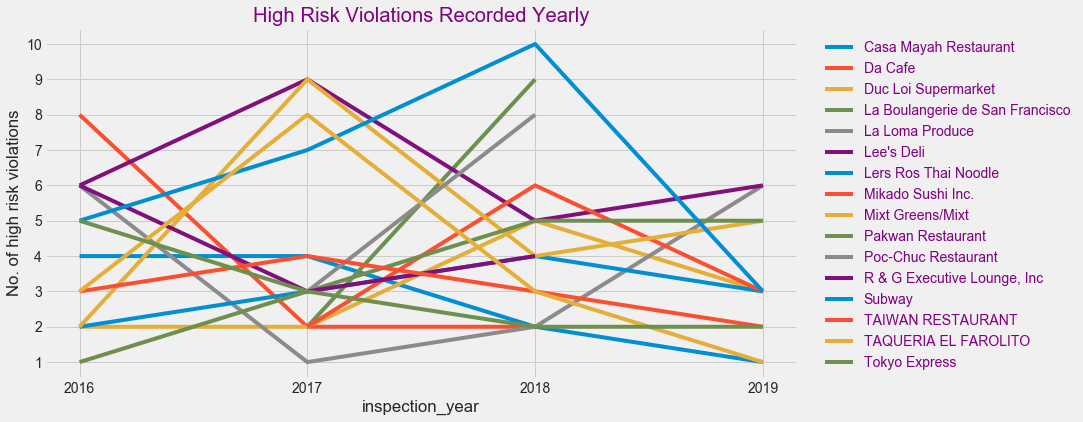

In [62]:
HRR_Yearly.pivot_table('high_risk_violations', index='inspection_year', columns='agg_biz_name').\
plot(legend=False,figsize=(12,6))
plt.xticks(np.arange(2016,2020,1.0))
plt.yticks(np.arange(1,11,1.0))
plt.ylabel('No. of high risk violations')
plt.title('High Risk Violations Recorded Yearly',fontdict={'color':'purple'})
leg=plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1.0), ncol=1)
for text in leg.get_texts():
    plt.setp(text, color = 'purple')
plt.show()

<font size='3' color='Green' face='Verdana'>
    <u>Inference:</u><br></font><br>
<font size='3' color='Black' face='Verdana'>
    Above is the vizualized data of San Francisco restaurants that were found to have reported the maximum number of high risk violations (more than 10) between 2016 to 2019. <br>The plot shows that the top risky and violating restaurants evidently lack quality as none of them show a steady fall in recording high risk violations against them over the years. It looks like they repeatedly have risk violations.</font>

<font size='3' color='Black' face='Verdana'>
    Next we wanted to look at how inspection results change by location. Our best informative column for region or location was zip code. But the zip code data needed to be cleaned up.
    </font>

In [65]:
scores.business_postal_code.unique()

array(['94118', '94108', '94112', '94102', '94114', '94103', '94105',
       '94107', '94110', '94109', '94104', nan, '94115', '94133', '94121',
       '94117', '94124', '94111', '94127', '94131', '95133', '94132',
       '94102-5917', '94123', '94122', '94134', '95109', '94116', '94158',
       '94130', '94544', '94901', '94602', '94080', '94143', '94188',
       '64110', '94402', '94301', '95117', '00000', '94101', '95122',
       '94123-3106', '94621', '94124-1917', '94129', '941033148', 'CA',
       '95112', 'Ca', '94014', '95132', '94120', '941102019', '94013',
       '941', '92672', '95105'], dtype=object)

<center><b><font size='4' color='Purple' face='Verdana'>MAKING ZIP CODES USABLE</font></b></center>

<font size='3' color='Black' face='Verdana'>
<b><i>Some data cleaning:</i></b> The regular and common pattern for business postal codes of the San Francisco restaurants per the data set is a 5 digit integer starting with "9". However, few records have some deviant values that are being marked as invalid and will be replaced with valid zip codes as foud from Google or Yelp. Using .loc to set values we will clean these bad zip code values replacing with real zip codes that can be used for analysis using 4 simple steps.
</font>

In [66]:
##Step 1: Copying invalid values from the 'business postal code' column of scores dataframe to an array 'invalid_zips'
invalid_zips = ['64110','94123-3106','94124-1917','941033148','Ca','941102019','941','94102-5917']

##Step 2: Copying true values found from Google or Yelp for the business names that correspond to the postal codes 
#in 'invalid_zips' to a new array 'valid_zips'
valid_zips = ['94103','94123','94124','94103','94133','94110','94123','94102']

##Step 3: Replacing invalid zip values with valid zip values. Each invalid zip value is being used by only one 
#business name so we can do this replacement with a simple code as below
for i in range(0,8):
    invalid_zip_rows = scores.loc[scores['business_postal_code'] ==str(invalid_zips[i])].index.tolist()
    scores.loc[invalid_zip_rows, ['business_postal_code']] = valid_zips[i]

##Step 4: One more invalid value namely "CA" was being shared by 2 different business names, so we can deal with these
#individually by referencing the business name directly
invalid_zip_rows = scores.loc[scores['business_name'] =='Japacurry'].index.tolist()
scores.loc[invalid_zip_rows, ['business_postal_code']] = 94104

invalid_zip_rows = scores.loc[scores['business_name'] =='Leo\'s Hot Dogs'].index.tolist()
scores.loc[invalid_zip_rows, ['business_postal_code']] = 94110

In [67]:
scores.business_postal_code.unique()

array(['94118', '94108', '94112', '94102', '94114', '94103', '94105',
       '94107', '94110', '94109', '94104', nan, '94115', '94133', '94121',
       '94117', '94124', '94111', '94127', '94131', '95133', '94132',
       '94123', '94122', '94134', '95109', '94116', '94158', '94130',
       '94544', '94901', '94602', '94080', '94143', '94188', '94402',
       '94301', '95117', '00000', '94101', '95122', '94621', '94129',
       94110, '95112', '94014', '95132', 94104, '94120', '94013', '92672',
       '95105'], dtype=object)

<font size='3' color='Black' face='Verdana'>
Looks like we have clean data for business postal codes now! <br>NaN will be ignored and "00000" will be accepted as zip code for food trucks/carts which do not have a single permanent zip code since they travel from place to place.</font><br><br>

<font size='3' color='Black' face='Verdana'>
Next, we wanted to look at some high risk violations by neighborhoods. Just to keep our vizualization simple, we looked at 2019 data for violations in the "high risk" category, for different zip codes.</font>

In [68]:
scores['business_postal_code']=pd.to_numeric(scores['business_postal_code'],downcast='integer')
scores['inspection_date']=pd.to_datetime(scores['inspection_date'])
Zip_High_Risk = scores.loc[(scores['risk_category']=='High Risk') & (scores['inspection_date'].dt.year==2019)].\
groupby('business_postal_code')['violation_id'].count().\
reset_index().rename(index=str,columns={'business_postal_code':'zip','violation_id':'high_risk_violations'}).\
sort_values(by='zip')

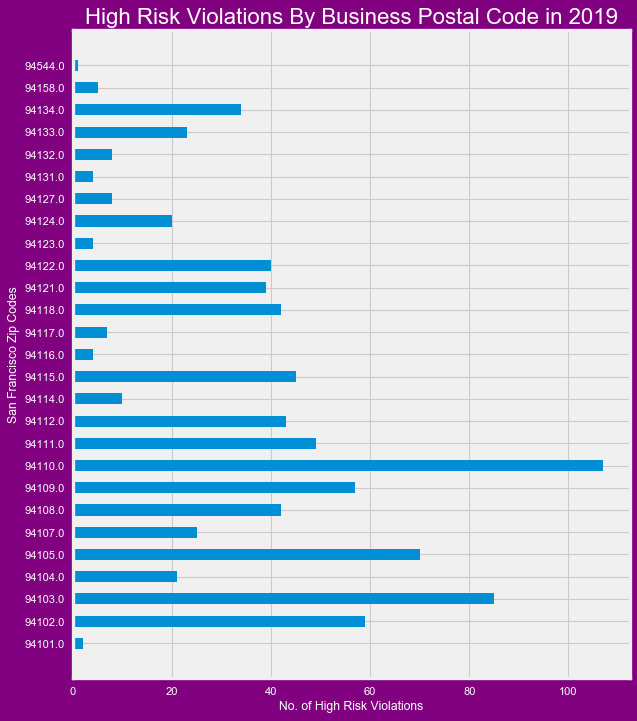

In [69]:
from matplotlib.pyplot import figure
objects = Zip_High_Risk['zip'].tolist()
y_pos = np.arange(len(objects))
Violations = Zip_High_Risk['high_risk_violations'].tolist()
figure(num=None, figsize=(8, 10),dpi=80, facecolor='purple', edgecolor='white')
plt.style.use('seaborn-notebook')
plt.title('High Risk Violations By Business Postal Code in 2019',fontdict={'size':20,'color':'white'})
plt.barh(y_pos, Violations, height=0.5, align='center')
plt.yticks(y_pos, objects,color='white')
plt.xticks(np.arange(0,101,20),color='white')
plt.xlabel('No. of High Risk Violations',color='white')
plt.ylabel('San Francisco Zip Codes',color='white')
plt.show()

<font size='3' color='Green' face='Verdana'>
    <u>Inference:</u><br></font><br>
<font size='3' color='Black' face='Verdana'>
    Above is the vizualized data of San Francisco zip codes and the restaurants in those zip codes that were found to have high risk violations (between 0 and 107) in the year 2019. <br>The plot shows that the <b>zip code 94110</b> had the maximum total no. of high risk violations. <br><br><br>Next, we thought it would be interesting to know if this zip code (with maximum high risk violations) also corresponds to one of the highest absolute populations or population densities.</font>

<center><b><font size='4' color='Purple' face='Verdana'>MERGING VIOLATIONS BY ZIP CODE WITH POPULATION DATA</font></b></center>

In [70]:
#Population and density data was put together for the various zip codes from http://www.city-data.com
pop = pop.rename(columns={'Zip Code':'zip','Population':'population','Population density':'density'})

#Merging our data about "high risk violations by zip code" with our data about populations
high_risk_pop = Zip_High_Risk.merge(pop,on='zip')
high_risk_pop['density']=pd.to_numeric(high_risk_pop['density'])
high_risk_pop.sort_values(by='high_risk_violations',ascending=False)

,zip,high_risk_violations,population,density
8,94110.0,107,74565,32066
2,94103.0,85,26116,19259
4,94105.0,70,6890,18652
1,94102.0,59,29739,44330
7,94109.0,57,56822,47834
9,94111.0,49,3481,10116
12,94115.0,45,35178,31529
10,94112.0,43,85205,25329
6,94108.0,42,14914,55226
15,94118.0,42,42259,21685


<font size='3' color='Green' face='Verdana'>
    <u>Inference:</u><br></font><br>
<font size='3' color='Black' face='Verdana'>
    Surely enough <b>zip code 94110</b> has one of the highest absolute populations and also highest density</font>

<font size='3' color='Black' face='Verdana'>
    Then we observed the distribution of the number of high risk violations over the different zones of population. Each point on the scatter plot is a unique zip code. </font>

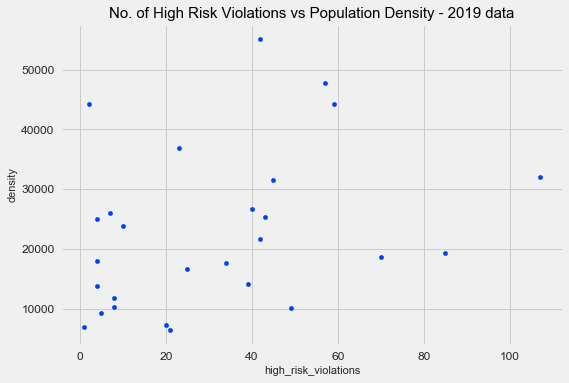

In [72]:
plt.style.use('seaborn-bright')
high_risk_pop.plot.scatter(x='high_risk_violations',y='density',fontsize=12)
plt.title("No. of High Risk Violations vs Population Density - 2019 data",fontdict={'fontsize': 15,'fontweight' : 15,
'verticalalignment': 'baseline','horizontalalignment': 'center','color':'black'})
plt.show()

<font size='3' color='Green' face='Verdana'>
    <u>Inference:</u><br></font><br>
<font size='3' color='Black' face='Verdana'>
Above is the vizualized data of San Francisco zip codes and the restaurants in those zip codes that were found to have high risk violations (between 0 and 107) in the year 2019. The plot shows that the <b>zip codes with maximum number of high risk violations have relatively medium population density</b>. <br><br>In the plot, each point is a zip code. We can also say that the <b>densest zip codes (in terms of populations) have quite a  high number of high risk violations (more than 40)</b></font>

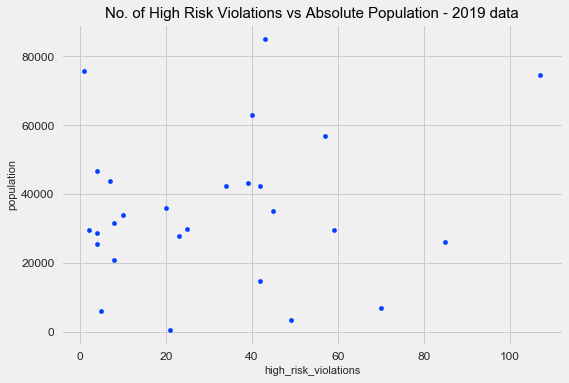

In [73]:
plt.style.use('seaborn-bright')
high_risk_pop.plot.scatter(x='high_risk_violations',y='population',fontsize=12)
plt.title("No. of High Risk Violations vs Absolute Population - 2019 data",fontdict={'fontsize': 15,'fontweight' : 15,
'verticalalignment': 'baseline','horizontalalignment': 'center','color':'black'})
plt.show()

<font size='3' color='Green' face='Verdana'>
    <u>Inference:</u><br></font><br>
<font size='3' color='Black' face='Verdana'>Above is the same data with y axis switched to absolute population just to see if the trends noted above change. They stay pretty much the same for all the data points except the outliers. Now we onserve that<b> the zip code with maximum number of high risk violations (more than 100) has the second to maximum absolute population of all</b>. <br><br>In the plot, each point is a zip code. But our second insight remains the same as observed with population density, wherein the <b> zip code with maximum absolute population has quite a  high number of high risk violations (more than 40).</b></font>

<center><b><font size='4' color='Purple' face='Verdana'>MERGING INCOME DATA</font></b></center>

In [74]:
income_data = pd.read_csv('/Users/aaa/Documents/NYU/Spring 2019/Data Bootcamp/Final Project/Zipcode_Income_Data2.csv')

In [75]:
income_data.dtypes

Neighborhood                object
business_postal_code         int64
Per_Capita_Income          float64
Median_Household_income    float64
dtype: object

In [76]:
scores2 = scores.dropna()

In [82]:
scores2['business_postal_code'] = scores2['business_postal_code'].astype(int)

/Users/supriyajha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [79]:
combo = scores2.merge(income_data, on = 'business_postal_code', how = 'left')

In [83]:
counts_by_income = combo.groupby('Median_Household_income')[['business_id']].count()

In [84]:
counts_by_income.sort_values(by = 'Median_Household_income')

,business_id
Median_Household_income,
17630.0,70
43151.0,93
44373.0,135
53283.0,209
53990.0,276
62917.0,231
63623.0,1042
67405.0,135
67584.0,574


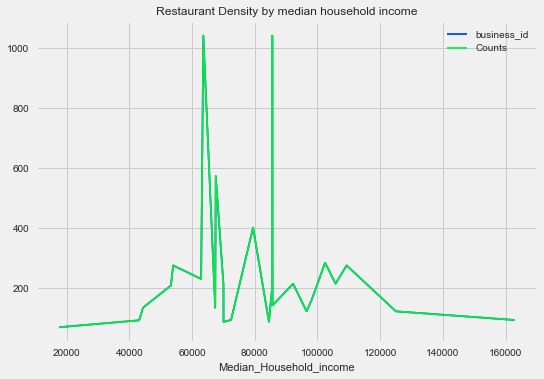

In [88]:
counts_by_income['Counts']=combo.groupby('Median_Household_income')[['business_id']].count()
counts_by_income.plot(title="Restaurant Density by median household income")
plt.show()

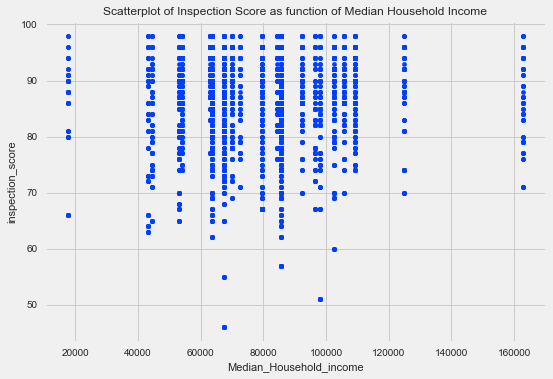

In [91]:
combo.plot.scatter(x='Median_Household_income',y='inspection_score',title="Scatterplot of Inspection Score as function of Median Household Income")
plt.show()

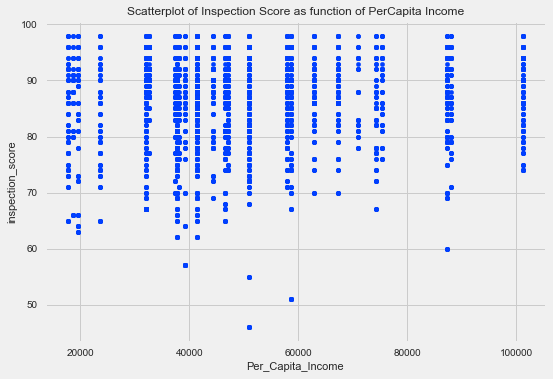

In [93]:
combo.plot.scatter(x='Per_Capita_Income',y='inspection_score',title="Scatterplot of Inspection Score as function of PerCapita Income")
plt.show()

<font size='3' color='Green' face='Verdana'>
    <u>Inference:</u><br></font><br>
<font size='3' color='Black' face='Verdana'>
Here we grouped the data set by median household income and counted the unique business IDs to see if the higher density areas are influenced by the median household income.  Are there more restaurants in higher income areas?  Looking at the data, it appears that the densest areas are in more middle income neighborhoods.  Of course, this could be related to the fact that these are in areas where there are many commuters, who may have high incomes but work in different neighborhoods from where they live.  Also, Fisherman's Wharf is popular with tourists, who may be high earners, but do not live in the neighborhoods where the restaurants are.</font>

In [130]:
combo4 = pd.DataFrame(combo.sort_values(['inspection_score'],
                                         ascending=[True]).groupby('Median_Household_income')['inspection_score'].mean())

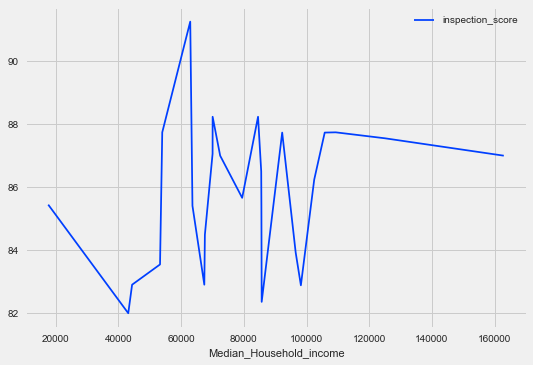

In [136]:
combo4.plot()
plt.show()

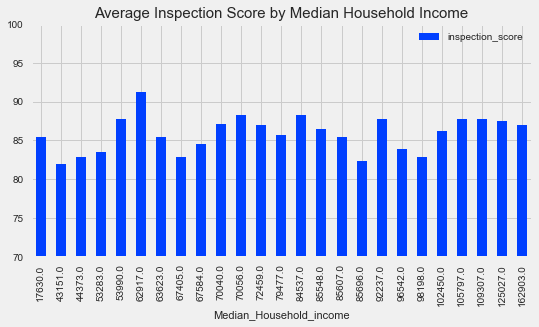

In [135]:
fig, ax = plt.subplots() 
combo4.plot(kind='bar', ax=ax, figsize = (8,4),
                  ylim = (70,100))
ax.set_title('Average Inspection Score by Median Household Income',size = 15)
plt.show()

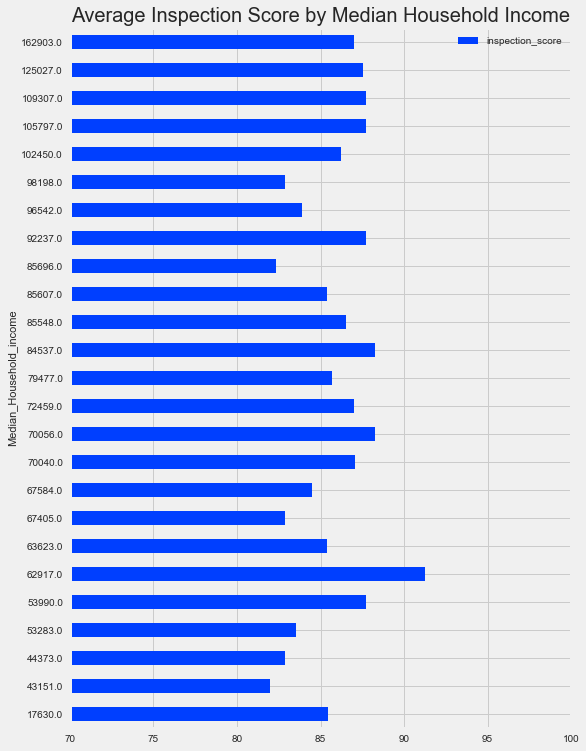

In [134]:
fig, ax = plt.subplots() 
combo4.plot(kind='barh', ax=ax, figsize = (8,12),
                  xlim = (70,100))
ax.set_title('Average Inspection Score by Median Household Income',size = 20)
plt.show()

<font size='3' color='Green' face='Verdana'>
    <u>Inference:</u><br></font><br>
<font size='3' color='Black' face='Verdana'>
It appears that the highest average score is in a fairly middle-class neighborhood</font>

<center><b><font size='4' color='Purple' face='Verdana'>MERGING INCOME AND POPULATION DATA WITH INSPECTION SCORES</font></b></center>

In [94]:
pop_by_zip = pd.read_csv('/Users/aaa/Documents/NYU/Spring 2019/Data Bootcamp/Final Project/Zipcode_Income_Data4.csv')

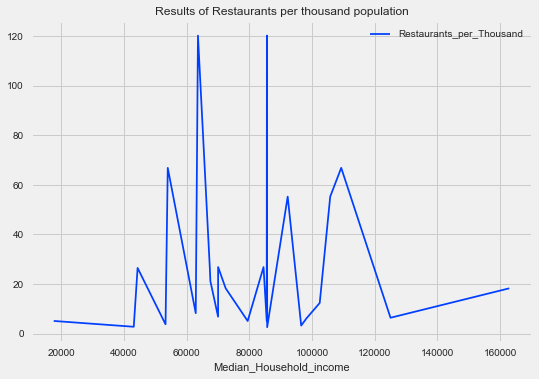

In [107]:
per_capita_combo =  combo.merge(pop_by_zip, on = 'business_postal_code', how = 'left')
per_capita_group = per_capita_combo.groupby('business_postal_code', as_index = False)[['business_id']].count()
per_capita_combo2 =  per_capita_group.merge(pop_by_zip, on = 'business_postal_code', how = 'left')
per_capita_combo3 = per_capita_combo2.merge(income_data, on = 'business_postal_code', how = 'left')
per_capita_combo3.columns=['business_postal_code', 'counts', 'Population', 'Neighborhood',
       'Per_Capita_Income', 'Median_Household_income']
per_capita_combo3 = per_capita_combo3.dropna()
per_capita_combo3['Pop/1000']= per_capita_combo3['Population']/1000
per_capita_combo3['Restaurants_per_Thousand']= per_capita_combo3['counts']/per_capita_combo3['Pop/1000']
per_capita_combo4 = per_capita_combo3.drop(['Neighborhood', 'Per_Capita_Income'], axis = 1)
per_thousand = pd.DataFrame(per_capita_combo4.groupby('Median_Household_income')['Restaurants_per_Thousand'].sum())
per_thousand.plot(title="Results of Restaurants per thousand population",legend=True)
plt.show()

<font size='3' color='Green' face='Verdana'>
    <u>Inference:</u><br></font><br>
<font size='3' color='Black' face='Verdana'>
Looks like the results are pretty similar, we still have the most in the middle class range.  I think this is because neighborhoods like fisherman's wharf and the financial district seem to have the most restaurants.  these are neighborhoods where more people come to visit (either for tourism at the wharf, or to work, in the financial district) than live there.  Therefore the demand for restaurants is not being created by the people who live there, but by commuters and tourists.</font>

<center><b><font size='4' color='Purple' face='Verdana'>MERGING WITH YELP DATA</font></b></center>

<font size='3' color='Black' face='Verdana'>
Here we took the highest 20 and lowest 20 inspection scores and explored whether or not the Yelp reviews are better or worse depending on the health department inspection scores</font>

In [112]:
combo2 = combo.sort_values(by = 'inspection_score')
combo_group = combo2.groupby('business_name')['inspection_score']

<font size='3' color='Black' face='Verdana'>
We took the top 20 and bottom 20 health inspection scores and found the corresponding Yelp reviews, we manually entered the yelp scores onto a CSV and merged back onto the original data frame.  Then we appended the dataframes (top 20 and bottom 20) to create one data frame to find interesting patterns.</font>

In [113]:
combo3 =pd.DataFrame(combo2.sort_values(['inspection_score'],ascending=[True]).groupby('business_name')['inspection_score'].mean())

In [115]:
combo_bottom_20 = combo3.sort_values(by = 'inspection_score').head(20)
combo_bottom_20 = pd.DataFrame(combo_bottom_20['inspection_score'])

In [116]:
yelp_bottom_20 = pd.read_csv('/Users/supriyajha/Documents/NYU/Spring 2019/Data Bootcamp/Final Project/Yelp_Bottom.csv')

In [117]:
combo_top_20 = combo3.sort_values(by = 'inspection_score').tail(20)
combo_top_20.to_csv('top_20')
yelp_top_20 = pd.read_csv('/Users/aaa/Documents/NYU/Spring 2019/Data Bootcamp/Final Project/yelp_top_20.csv', index_col = False)

In [121]:
Yelp1 = combo_top_20.merge(yelp_top_20,on = 'business_name', how = 'left')
Yelp2 = yelp_bottom_20.merge(combo_bottom_20, on = 'business_name', how = 'left')
Yelp3 = Yelp1.append(Yelp2)
YelpFinal = Yelp3[['business_name', 'Yelp_Score', 'inspection_score']]

In [122]:
YelpFinal

,business_name,Yelp_Score,inspection_score
0,AFC Sushi @ Safeway #1490,3.0,98.000000
1,Zaida T. Rodriguez (ZTR) Annex Child Developme...,NaN,98.000000
2,Zaida T. Rodriguez (ZTR) Child Development Center,NaN,98.000000
3,Juice Shop,4.5,98.000000
4,GUADALUPE ELEMENTARY SCHOOL,3.0,98.000000
5,STARBUCKS COFFEE #545,3.5,98.000000
6,Ida B Wells Continuation High School,NaN,98.000000
7,FAIRMOUNT ELEMENTARY SCHOOL,NaN,98.000000
8,Rooftop Middle School,3.5,98.000000
9,FRIENDS LIQUOR,3.0,98.000000


<center><b><font size='4' color='Purple' face='Verdana'>REGRESSION TO CORRELATE YELP SCORE AND INSPECTION SCORE</font></b></center>

In [124]:
print(smf.ols('Yelp_Score ~ inspection_score',data=YelpFinal).fit().summary())

                            OLS Regression Results                            
Dep. Variable:             Yelp_Score   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1.552
Date:                Wed, 15 May 2019   Prob (F-statistic):              0.223
Time:                        22:35:36   Log-Likelihood:                -26.645
No. Observations:                  31   AIC:                             57.29
Df Residuals:                      29   BIC:                             60.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.8462      0.599  

<font size='3' color='Green' face='Verdana'>
    <u>Inference:</u><br></font><br>
<font size='3' color='Black' face='Verdana'>
The R-Squared is pretty low and the coefficient is positive, suggesting that the higher the inspection score the higher the Yelp score</font>

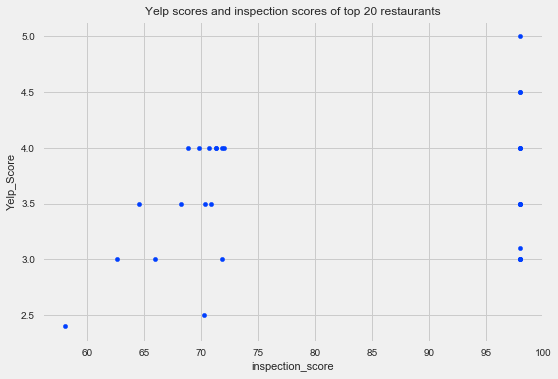

In [127]:
YelpFinal.plot.scatter(x = 'inspection_score', y = 'Yelp_Score',title="Yelp scores and inspection scores of top 20 restaurants")
plt.show()

<font size='3' color='Green' face='Verdana'>
    <u>Inference:</u><br></font><br>
<font size='3' color='Black' face='Verdana'>
The plot above shows that the only 5 star restaurant on the list of top/bottom 20, is one that has received a 98 inspection score. It also shows that the lowest yelp review corresponds to the lowest health inspection score</font>

<center><b><font size='4' color='Purple' face='Verdana'>MACHINE LEARNING - CLASSIFICATION</font></b></center>

<font size='3' color='Black' face='Verdana'>
In this section we decided to see if our data is telling enough to predict whether or not an inspection will result in a high risk violation.</font>

<font size='3' color='Black' face='Verdana'>
Of course not all fields in the scores data frame are useful for a classification task such as this. Especially if we want to predict whether or not a violation will be in the high risk category, we definitely do not care about names, location names, phone numbers, city, state of the restaurants. We also do not need to keep fields that are dependent on another. So we can get rid of fields like "zip codes" (dependent on "business postal code"), latitude, longitude (dependent on locations), dates are not informative, neither are ID's. "Violation description" and "violations ids" can directly determine the risk category through a one-to-one mapping, so we will remove those as well. Similarly, the field 'Analysis Neighborhoods' will be removed because of it's duplicative nature (with respect to 'Neighborhoods').</font>

In [165]:
scores.columns

Index(['business_id', 'business_name', 'business_address', 'business_city',
       'business_state', 'business_postal_code', 'business_latitude',
       'business_longitude', 'business_location', 'business_phone_number',
       'inspection_id', 'inspection_date', 'inspection_score',
       'inspection_type', 'violation_id', 'violation_description',
       'risk_category', 'Neighborhoods', 'Police Districts',
       'Supervisor Districts', 'Fire Prevention Districts', 'Zip Codes',
       'Analysis Neighborhoods', 'agg_biz_name', 'chain', 'coffee', 'school',
       'fish', 'bar', 'bakery', 'food_truck', 'senior', 'cafeteria', 'taco',
       'burger'],
      dtype='object')

In [171]:
scores_ml = scores.drop(columns=['business_id', 'business_name', 'business_address', 'business_city',
       'business_state','business_latitude','business_longitude', 'business_location', 'business_phone_number',
       'inspection_id', 'inspection_date','violation_id', 'violation_description','Zip Codes',
                                 'Analysis Neighborhoods','agg_biz_name'])
scores_ml=scores_ml.drop(columns=['chain', 'coffee', 'school', 'fish', 'bar', 'bakery',
       'food_truck', 'senior', 'cafeteria', 'taco', 'burger'])

In [172]:
#We will also drop nulls but in a controlled manner
#In that we will try to retain as many rows as possible in the various inspection type categories. 
#Dropping nulls selectively
scores_ml = scores_ml.dropna(subset=['Neighborhoods','Fire Prevention Districts','risk_category',
                                     'business_postal_code'])

In [173]:
#Since the 'inspection score' is an important field in this analysis, we will try to replace nulls 
#with whatever makes most sense so that we can have as much data as possible
#Replacing null scores with median scores
median_score = scores_ml["inspection_score"].median()
scores_ml = scores_ml.fillna({"inspection_score": median_score})
scores_ml = scores_ml.reset_index().drop(columns=['index'])

<font size='3' color='Black' face='Verdana'>
The field 'inspection type' has around 9 unique values. <br>If we convert this to a categorical value using <font color='purple'><b>label encoding</b></font>, the data can be used to run classification algorithms. This is done in two simple steps:</font>

In [174]:
#Step 1: Convert the column to a category using astype method
scores_ml["inspection_type"] = scores_ml["inspection_type"].astype('category')
scores_ml.dtypes #Now all other fields except "risk category"(which we will handle subsequently) are numeric

business_postal_code          float64
inspection_score              float64
inspection_type              category
risk_category                  object
Neighborhoods                 float64
Police Districts              float64
Supervisor Districts          float64
Fire Prevention Districts     float64
dtype: object

In [175]:
#Step 2: Encode the different values of 'inspection type' column by using the .cat accessor of the new category field
scores_ml["insp_type_cat"] = scores_ml["inspection_type"].cat.codes
scores_ml.insp_type_cat.nunique() #This new field will have the same number of unique values as the object field

9

In [176]:
scores_ml = scores_ml.drop(columns=['inspection_type']) #We donot need the field 'inspection type' any more

<font size='3' color='Black' face='Verdana'>
The field 'risk category' has around 3 unique values: "Low", "Moderate", "High". <br>If we convert this to a categorical value using <font color='purple'><b>one hot encoding</b></font>, the data can be used to run classification algorithms. This is done in one simple step:</font>

In [177]:
#Step: Create dummy variables for each of the possible values of the field
scores_ml = pd.get_dummies(scores_ml, columns=["risk_category"]) #Creates 3 new columns for 'low', 'moderate', 'high'

<font size='3' color='Black' face='Verdana'>
We notice that the business postal code also essentially has 26 unique values so it won't be a bad idea to convert that into a category as well using our favorite <font color='purple'><b>label encoding</b></font> again.</font>

In [178]:
#Step 1: Convert the column to a category using astype method
scores_ml['business_postal_code']=scores_ml["business_postal_code"].astype('category')
#Step 2: Encode the different values of 'inspection type' column by using the .cat accessor of the new category field
scores_ml["business_postal_code"] = scores_ml["business_postal_code"].cat.codes

In [179]:
#Renaming all columns of the data frame to shorter names without white spaces
scores_ml = scores_ml.rename(columns={'business_postal_code':'zip_cat','inspection_score':'score',
                      'Neighborhoods':'neighborhoods','Police Districts':'police_dis','Supervisor Districts':
                      'supervisor_dis','Fire Prevention Districts':'fire_dis','insp_type_cat':'type_cat',
                                      'risk_category_High Risk':'high_risk','risk_category_Low Risk':'low_risk',
                                      'risk_category_Moderate Risk':'mod_risk'})

In [180]:
scores_ml #Now we have all numerical data and renamed fields

,zip_cat,score,neighborhoods,police_dis,supervisor_dis,fire_dis,type_cat,high_risk,low_risk,mod_risk
0,9,86.0,36.0,9.0,9.0,13.0,0,1,0,0
1,4,86.0,34.0,2.0,9.0,8.0,0,1,0,0
2,9,75.0,32.0,9.0,10.0,13.0,7,0,1,0
3,6,85.0,6.0,2.0,9.0,12.0,7,0,0,1
4,9,92.0,21.0,1.0,10.0,13.0,7,0,1,0
5,10,85.0,2.0,7.0,7.0,2.0,7,1,0,0
6,27,82.0,28.0,3.0,7.0,10.0,7,0,1,0
7,3,92.0,36.0,10.0,9.0,14.0,7,0,0,1
8,3,96.0,36.0,1.0,10.0,5.0,7,0,1,0
9,7,76.0,6.0,2.0,9.0,6.0,7,0,1,0


In [181]:
scores_ml.columns

Index(['zip_cat', 'score', 'neighborhoods', 'police_dis', 'supervisor_dis',
       'fire_dis', 'type_cat', 'high_risk', 'low_risk', 'mod_risk'],
      dtype='object')

In [182]:
scores_ml.high_risk.value_counts()

0    17991
1     2980
Name: high_risk, dtype: int64

<font size='3' color='Black' face='Verdana'>
The variable to be predicted (y-hat) is "high_risk". We will first set up our x and y variables in order to statistically determine the same. <br>
<br>
How do we determine which fields to include in our classification model? Every variable you consider including should correspond to a different value of another variable. It's like if you were going down a decision tree you do not want to be traversing the same path down because that would mean that the variables are being mapped one-to-one or are dependent on each other.<br>
<br>
The fields we would like to include in our model are:<br>
1. <b>type_cat</b>: The type of inspection conducted(example: routine-unschedule)<br>
2. <b>score</b>: The overall score received on the inspection (on a scale of 0 to 100)<br>
3. <b>zip_cat</b>: One of 26 valid San Francisco zip codes in our data<br>
4. <b>supervisor_dis</b>: how many supervisor districts are specific to that zip code<br>
5. <b>neighborhoods</b>: how many neighborhoodss are specific to that zip code</font>

In [183]:
from patsy import dmatrices
y,X = dmatrices('high_risk ~ type_cat+zip_cat+score+neighborhoods+supervisor_dis',data=scores_ml)

In [184]:
y = np.ravel(y)

<font size='3' color='Black' face='Verdana'>
We first try <b>LOGISTIC REGRESSION</b> and obtain a score</b>

In [185]:
from sklearn.linear_model import LogisticRegression as logit
logit(solver='lbfgs').fit(X,y).score(X,y)

array(0.85623003)

<font size='3' color='Black' face='Verdana'>
    Let's use <b>Cross Validation Score</b> as our evaluation model. <b>Accuracy</b> is the most commonly used metric for classification models.</font>

In [186]:
from sklearn.model_selection import cross_val_score
cross_val_score(logit(solver='lbfgs'),X,y,cv=5,scoring='accuracy').mean()

0.8563253595152391

<font size='3' color='Black' face='Verdana'>
    Let's also find the <b>AUC</b> for our logistic regression model.</font>

In [187]:
cross_val_score(logit(solver='lbfgs'),X,y,cv=5,scoring='roc_auc').mean()

0.7013067724225103

<font size='3' color='Black' face='Verdana'>
    <b>K Nearest Neighbors (KNN)</b> is another common machine learning algo used for classification. Let's obtain a cross validation score for that as well just to compare with the performance of logistic regression.</font>

In [188]:
from sklearn.neighbors import KNeighborsClassifier as knn
cross_val_score(knn(),X,y,cv=5,scoring='accuracy').mean()

0.8349623703309627

<font size='3' color='Black' face='Verdana'>
    <b>Random Forest Classifier</b> is another commonly used algorithm which performs well for classification purposes.</font>

In [189]:
from sklearn.ensemble import RandomForestClassifier as rf
cross_val_score(rf(n_estimators=100, max_depth=5,max_features=5),X,y,cv=5,scoring='accuracy').mean()

0.8633826972296538

<font size='3' color='Black' face='Verdana'>
    We could perform some <b>Hyperparameter Tuning</b>, to obtain optimal values for max depth and max features.</b>

In [192]:
for i in range(1,10): #Usually the best values for max depth are achieved within this range
    for j in range(1,6): #We only have 5 features in our model
        print(i,j,cross_val_score(rf(n_estimators=100,max_depth=i,max_features=j),X,y,cv=5,scoring='accuracy').mean())

1 1 0.8578990020933475
1 2 0.8578990020933475
1 3 0.8578990020933475
1 4 0.8578990020933475
1 5 0.8578990020933475
2 1 0.8578990020933475
2 2 0.8578990020933475
2 3 0.8578990020933475
2 4 0.8578990020933475
2 5 0.8578990020933475
3 1 0.8578990020933475
3 2 0.8578990020933475
3 3 0.8578990020933475
3 4 0.8578990020933475
3 5 0.8633826972296538
4 1 0.8578990020933475
4 2 0.8578990020933475
4 3 0.8578990020933475
4 4 0.8633826972296538
4 5 0.8633826972296538
5 1 0.8578990020933475
5 2 0.8578990020933475
5 3 0.862047490512299
5 4 0.8633826972296538
5 5 0.8633826972296538
6 1 0.8578990020933475
6 2 0.8578513149211968
6 3 0.8631442954717649
6 4 0.8632873228853525
6 5 0.863191948541051
7 1 0.8578990020933475
7 2 0.858614264205122
7 3 0.8631442613689003
7 4 0.8630965741967497
7 5 0.8622858922701878
8 1 0.8576605776002155
8 2 0.8618567304560747
8 3 0.8627627753593163
8 4 0.8625720380383349
8 5 0.8611890986783435
9 1 0.8570883656372716
9 2 0.8625720607735781
9 3 0.8618090660191668
9 4 0.86109380

<font size='3' color='Black' face='Verdana'>
Clearly the random forest classifier is yielding the highest accuracy figure <font color='purple'><b>86.34%</b></font> (at max depth 5 and max features 5). So let's predict our y-hat using this algorithm.</font>

In [190]:
scores_ml['high_risk_rf'] = rf(n_estimators=100, max_depth=5,max_features=5).fit(X,y).predict(X)

In [191]:
scores_ml.high_risk_rf.value_counts() #Model predicts 115 of the 20,971 inspections result in high risk violations

0.0    20856
1.0      115
Name: high_risk_rf, dtype: int64

<font size='4' color='Purple' face='Verdana'>
    <center>******************End of Project***********************</center><br>
    <center>Thank you!!</center></font>